Exploratory Data Analysis + Data Pre-Processing & Data Cleaning

In [1]:
# imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# read in data
raw_data = pd.read_csv('../data/raw/Bos_crime_2023.csv')

In [2]:
print(raw_data.describe())
print(raw_data.info())

                _id  OFFENSE_CODE  OFFENSE_CODE_GROUP      SHOOTING  \
count  81133.000000  81133.000000                 0.0  81133.000000   
mean   40567.000000   2340.595861                 NaN      0.008073   
std    23421.224032   1175.333353                 NaN      0.089488   
min        1.000000    111.000000                 NaN      0.000000   
25%    20284.000000   1106.000000                 NaN      0.000000   
50%    40567.000000   2907.000000                 NaN      0.000000   
75%    60850.000000   3201.000000                 NaN      0.000000   
max    81133.000000   3831.000000                 NaN      1.000000   

               YEAR         MONTH          HOUR  UCR_PART           Lat  \
count  81133.000000  81133.000000  81133.000000       0.0  7.528700e+04   
mean    2023.044261      6.361481     12.486411       NaN  4.232312e+01   
std        0.205675      3.530441      6.564979       NaN  1.576223e-01   
min     2023.000000      1.000000      0.000000       NaN  1

In [3]:
# print all types of OFFENSE_DESCRIPTION
print(raw_data['OFFENSE_DESCRIPTION'].unique())

['FRAUD - IMPERSONATION' 'VANDALISM' 'INVESTIGATE PERSON'
 'M/V - LEAVING SCENE - PROPERTY DAMAGE'
 'LARCENY THEFT FROM MV - NON-ACCESSORY' 'M/V ACCIDENT - PERSONAL INJURY'
 'THREATS TO DO BODILY HARM' 'SICK ASSIST - DRUG RELATED ILLNESS'
 'FRAUD - WELFARE' 'M/V ACCIDENT - OTHER' 'SICK ASSIST' 'VERBAL DISPUTE'
 'INVESTIGATE PROPERTY' 'ASSAULT - SIMPLE' 'BURGLARY - RESIDENTIAL'
 'TOWED MOTOR VEHICLE' 'ASSAULT - AGGRAVATED'
 'PROPERTY - LOST THEN LOCATED' 'HARASSMENT/ CRIMINAL HARASSMENT'
 'PROPERTY - LOST/ MISSING' 'OPERATING UNDER THE INFLUENCE (OUI) ALCOHOL'
 'VAL - OPERATING W/O AUTHORIZATION LAWFUL' 'LICENSE PREMISE VIOLATION'
 'SICK/INJURED/MEDICAL - PERSON' 'M/V ACCIDENT - PROPERTY DAMAGE'
 'LARCENY THEFT FROM BUILDING' 'AUTO THEFT'
 'M/V ACCIDENT - INVOLVING PEDESTRIAN - INJURY'
 'MURDER, NON-NEGLIGENT MANSLAUGHTER' 'PROPERTY - FOUND'
 'LIQUOR/ALCOHOL - DRINKING IN PUBLIC' 'VAL - VIOLATION OF AUTO LAW'
 'ROBBERY' 'LARCENY THEFT OF MV PARTS & ACCESSORIES' 'MISSING PERSON'
 'FIRE R

In [4]:
# create a list of all crime descriptions and their counts
crime_list = raw_data['OFFENSE_DESCRIPTION'].value_counts().reset_index().values.tolist()

# print crime_list
print(crime_list)

# save crime_list to csv
crime_df = pd.DataFrame(crime_list)
crime_df.to_csv('../data/processed/crime_list.csv', index=False)

print('Done!')


[['INVESTIGATE PERSON', 8741], ['SICK ASSIST', 6869], ['M/V - LEAVING SCENE - PROPERTY DAMAGE', 4759], ['INVESTIGATE PROPERTY', 3610], ['TOWED MOTOR VEHICLE', 3424], ['ASSAULT - SIMPLE', 3210], ['VANDALISM', 3132], ['LARCENY SHOPLIFTING', 2988], ['PROPERTY - LOST/ MISSING', 2519], ['LARCENY THEFT FROM BUILDING', 2164], ['LARCENY THEFT FROM MV - NON-ACCESSORY', 2026], ['M/V ACCIDENT - PROPERTY DAMAGE', 1910], ['THREATS TO DO BODILY HARM', 1864], ['VERBAL DISPUTE', 1854], ['DRUGS - POSSESSION/ SALE/ MANUFACTURING/ USE', 1810], ['LARCENY ALL OTHERS', 1713], ['M/V ACCIDENT - OTHER', 1648], ['ASSAULT - AGGRAVATED', 1585], ['MISSING PERSON - LOCATED', 1283], ['HARASSMENT/ CRIMINAL HARASSMENT', 1273], ['FRAUD - FALSE PRETENSE / SCHEME', 1262], ['SICK/INJURED/MEDICAL - PERSON', 1236], ['VAL - VIOLATION OF AUTO LAW', 1138], ['AUTO THEFT', 1121], ['M/V ACCIDENT - PERSONAL INJURY', 1041], ['PROPERTY - FOUND', 985], ['SICK ASSIST - DRUG RELATED ILLNESS', 812], ['ROBBERY', 794], ['LARCENY THEFT OF 

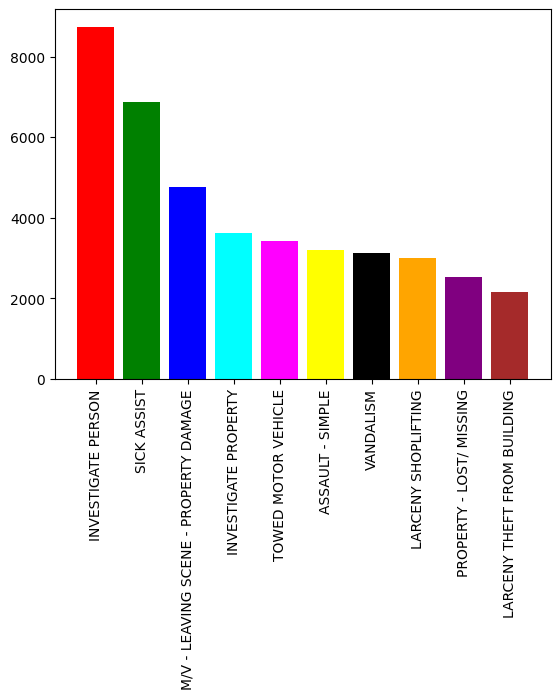

In [5]:
# draw a bar chart of the top 10 crimes using different colors for each crime

# create a list of the top 10 crimes
top_10_crimes = raw_data['OFFENSE_DESCRIPTION'].value_counts().head(10).reset_index().values.tolist()

# draw a bar chart of the top 10 crimes
plt.bar(range(len(top_10_crimes)), [val[1] for val in top_10_crimes], align='center', color=['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple', 'brown'])
plt.xticks(range(len(top_10_crimes)), [val[0] for val in top_10_crimes])
plt.xticks(rotation=90)

# save bar chart to file

plt.savefig('../reports/figures/top_10_crimes.png') # need to call this before plt.show() or else it will save a blank image


plt.show()

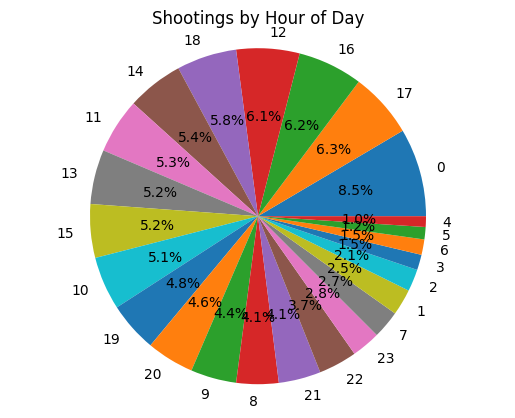

In [6]:
# count shootings by hour of day
shootings_by_hour = raw_data['HOUR'].value_counts().reset_index().values.tolist()

# draw a pie chart of shootings by hour of day
plt.pie([val[1] for val in shootings_by_hour], labels=[val[0] for val in shootings_by_hour], autopct='%1.1f%%')
plt.title('Shootings by Hour of Day')
plt.axis('equal')

# save pie chart to file
plt.savefig('../reports/figures/shootings_by_hour.png')

plt.show()


In [7]:
# drop Offense Code group column
raw_data.drop('OFFENSE_CODE_GROUP', axis=1, inplace=True)

# drio UCR_PART column
raw_data.drop('UCR_PART', axis=1, inplace=True)

# drop lat and long and location columns
raw_data.drop('Lat', axis=1, inplace=True)
raw_data.drop('Long', axis=1, inplace=True)
raw_data.drop('Location', axis=1, inplace=True)

# drop incident number column
raw_data.drop('INCIDENT_NUMBER', axis=1, inplace=True)

print(raw_data.shape)


# never run this repeatedly!!!!!!!!!!!!!!!

(81133, 12)


In [8]:
# drop rows with null values]
raw_data.dropna(inplace=True)
raw_data.reset_index(drop=True, inplace=True)
print(raw_data.shape)

(80929, 12)


In [9]:
# save cleaned data to csv
raw_data.to_csv('../data/processed/cleaned_data.csv', index=False)

print('Done!')

Done!


In [10]:
# Feature Engineering

data = pd.read_csv('../data/processed/cleaned_data.csv')

# add a new column set default to 0 for all rows
data['Severe_crimes'] = 0

# print the number of 0s in the new column
print(data['Severe_crimes'].value_counts())

# set the value of Sevre_crimes to 1 if the crime involves shooting
data.loc[data['SHOOTING'] == 1, 'Severe_crimes'] = 1

# set the value of Sevre_crimes to 1 if the crime description contains the following words
data.loc[data['OFFENSE_DESCRIPTION'].str.contains('ASSAULT', case=False), 'Severe_crimes'] = 1
data.loc[data['OFFENSE_DESCRIPTION'].str.contains('MURDER', case=False), 'Severe_crimes'] = 1
data.loc[data['OFFENSE_DESCRIPTION'].str.contains('ARSON', case=False), 'Severe_crimes'] = 1
data.loc[data['OFFENSE_DESCRIPTION'].str.contains('KIDNAPPING', case=False), 'Severe_crimes'] = 1
data.loc[data['OFFENSE_DESCRIPTION'].str.contains('MANSLAUGHTER', case=False), 'Severe_crimes'] = 1
data.loc[data['OFFENSE_DESCRIPTION'].str.contains('BREAKING', case=False), 'Severe_crimes'] = 1


Severe_crimes
0    80929
Name: count, dtype: int64


In [11]:
# save cleaned data to csv
data.to_csv('../data/processed/cleaned_data.csv', index=False)

print('Done!')


Done!


In [12]:
# read in the data 
data = pd.read_csv('../data/processed/Cleaned_Data.csv')

In [13]:
# print the number of 0s in the new column
print(data['Severe_crimes'].value_counts())

Severe_crimes
0    75556
1     5373
Name: count, dtype: int64


In [14]:


# use the 2024 data as testing data
test_data = data[data["YEAR"] == 2024]

# use train test split to split the data into training and validation data
train_data, val_data = train_test_split(data[data["YEAR"] != 2024], test_size=0.2)

# save the data
train_data.to_csv("../data/processed/train_data.csv", index=False)
val_data.to_csv("../data/processed/val_data.csv", index=False)
test_data.to_csv("../data/processed/test_data.csv", index=False)



In [15]:
# describe the data
print("Training Data")
print(train_data.describe())

Training Data
                _id  OFFENSE_CODE      SHOOTING     YEAR         MONTH  \
count  61877.000000  61877.000000  61877.000000  61877.0  61877.000000   
mean   39011.358615   2338.513115      0.008307   2023.0      6.614283   
std    22557.935929   1175.798607      0.090763      0.0      3.418810   
min        2.000000    111.000000      0.000000   2023.0      1.000000   
25%    19365.000000   1106.000000      0.000000   2023.0      4.000000   
50%    39015.000000   2907.000000      0.000000   2023.0      7.000000   
75%    58555.000000   3201.000000      0.000000   2023.0     10.000000   
max    81133.000000   3831.000000      1.000000   2023.0     12.000000   

               HOUR  Severe_crimes  
count  61877.000000   61877.000000  
mean      12.500558       0.066632  
std        6.569869       0.249386  
min        0.000000       0.000000  
25%        8.000000       0.000000  
50%       13.000000       0.000000  
75%       18.000000       0.000000  
max       23.000000    

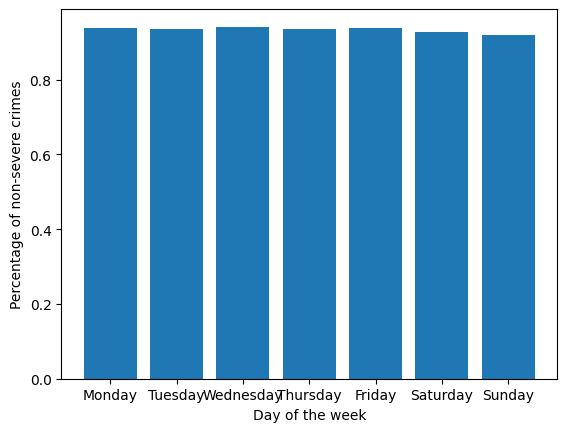

In [16]:
# do a percentage of non-severe crimes by day of the week
percentage_non_severe_crimes = []

for day in ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]:
    percentage_non_severe_crimes.append(train_data[train_data["DAY_OF_WEEK"] == day]["Severe_crimes"].value_counts()[0] / train_data[train_data["DAY_OF_WEEK"] == day]["Severe_crimes"].value_counts().sum())

plt.bar(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], percentage_non_severe_crimes)
plt.xlabel("Day of the week")
plt.ylabel("Percentage of non-severe crimes")
# save the plot
plt.savefig("../reports/figures/percentage_non_severe_crimes_by_day_of_week.png")

plt.show()

Feature Engineering & Feature Selection

In [17]:
from sklearn.preprocessing import LabelEncoder
# read in train,test, and val data
train = pd.read_csv('../data/processed/train_data.csv')
test = pd.read_csv('../data/processed/test_data.csv')
val = pd.read_csv('../data/processed/val_data.csv')

In [18]:
# remove id column
train = train.drop(columns=['_id'])
# find duplicate rows
print(train.duplicated().sum())

173


In [19]:
# remove duplicate rows
train = train.drop_duplicates()
# find duplicate rows
print(train.duplicated().sum())


0


In [20]:
# remove columns that are not needed 

# remove REPORTING_AREA, SHOOTING
train = train.drop(columns=['REPORTING_AREA', 'SHOOTING'])
train.head()

,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Severe_crimes
0,3201,PROPERTY - LOST/ MISSING,A1,2023-11-28 00:00:00+00,2023,11,Tuesday,0,SUDBURY ST,0
1,1402,VANDALISM,A1,2023-05-30 00:09:00+00,2023,5,Tuesday,0,HAVERHILL ST,0
2,1001,FORGERY / COUNTERFEITING,E13,2023-06-15 09:21:00+00,2023,6,Thursday,9,CENTRE ST,0
3,1402,VANDALISM,E5,2023-01-19 10:31:00+00,2023,1,Thursday,10,WASHINGTON ST,0
4,1831,SICK ASSIST,B3,2023-10-16 10:01:00+00,2023,10,Monday,10,DARLINGTON ST,0


In [21]:
# remove YEAR since its all 2023
train = train.drop(columns=['YEAR'])

In [22]:
# change OCCURRED_ON_DATE to datetime
train['OCCURRED_ON_DATE'] = pd.to_datetime(train['OCCURRED_ON_DATE'])

In [23]:
# change day of week to numbers monday = 0, sunday = 6
train['DAY_OF_WEEK'] = train['OCCURRED_ON_DATE'].dt.dayofweek
train.head()

# remove year from OCCURRED_ON_DATE
train['OCCURRED_ON_DATE'] = train['OCCURRED_ON_DATE'].dt.strftime('%m-%d')

In [24]:
# Remove spaces in OFFENSE_DESCRIPTION
train['OFFENSE_DESCRIPTION'] = train['OFFENSE_DESCRIPTION'].str.replace(' ', '')
remove = ['-', '(', ')', '/']
for r in remove:
    train['OFFENSE_DESCRIPTION'] = train['OFFENSE_DESCRIPTION'].str.replace(r, '')



In [25]:
# do the same for test and val data
test = test.drop(columns=['REPORTING_AREA', 'SHOOTING', 'YEAR'])

val = val.drop(columns=['REPORTING_AREA', 'SHOOTING', 'YEAR'])

# change OCCURRED_ON_DATE to datetime
test['OCCURRED_ON_DATE'] = pd.to_datetime(test['OCCURRED_ON_DATE'])
val['OCCURRED_ON_DATE'] = pd.to_datetime(val['OCCURRED_ON_DATE'])

# change day of week to numbers monday = 0, sunday = 6
test['DAY_OF_WEEK'] = test['OCCURRED_ON_DATE'].dt.dayofweek
val['DAY_OF_WEEK'] = val['OCCURRED_ON_DATE'].dt.dayofweek

# remove year from OCCURRED_ON_DATE
test['OCCURRED_ON_DATE'] = test['OCCURRED_ON_DATE'].dt.strftime('%m-%d')
val['OCCURRED_ON_DATE'] = val['OCCURRED_ON_DATE'].dt.strftime('%m-%d')

# Remove spaces in OFFENSE_DESCRIPTION
test['OFFENSE_DESCRIPTION'] = test['OFFENSE_DESCRIPTION'].str.replace(' ', '')
val['OFFENSE_DESCRIPTION'] = val['OFFENSE_DESCRIPTION'].str.replace(' ', '')

for r in remove:
    test['OFFENSE_DESCRIPTION'] = test['OFFENSE_DESCRIPTION'].str.replace(r, '')
    val['OFFENSE_DESCRIPTION'] = val['OFFENSE_DESCRIPTION'].str.replace(r, '')

# check the data types of each column
train.dtypes


OFFENSE_CODE            int64
OFFENSE_DESCRIPTION    object
DISTRICT               object
OCCURRED_ON_DATE       object
MONTH                   int64
DAY_OF_WEEK             int32
HOUR                    int64
STREET                 object
Severe_crimes           int64
dtype: object

In [26]:
# remove street column
train = train.drop(columns=['STREET'])
test = test.drop(columns=['STREET'])
val = val.drop(columns=['STREET'])

In [27]:
# encode all non-numeric columns
# reset the label encoder
le_description = LabelEncoder()
le_district = LabelEncoder()


# fit and transform the label encoder
train['OFFENSE_DESCRIPTION'] = le_description.fit_transform(train['OFFENSE_DESCRIPTION'])
train['DISTRICT'] = le_district.fit_transform(train['DISTRICT'])

In [28]:
train.head()

,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,OCCURRED_ON_DATE,MONTH,DAY_OF_WEEK,HOUR,Severe_crimes
0,3201,87,0,11-28,11,1,0,0
1,1402,110,0,05-30,5,1,0,0
2,1001,32,9,06-15,6,3,9,0
3,1402,110,11,01-19,1,3,10,0
4,1831,96,4,10-16,10,0,10,0


In [29]:
# do the same for test and val data
# add new label if the value is unseen in the training data
test['OFFENSE_DESCRIPTION'] = test['OFFENSE_DESCRIPTION'].map(lambda s: '<unknown>' if s not in le_description.classes_ else s)
val['OFFENSE_DESCRIPTION'] = val['OFFENSE_DESCRIPTION'].map(lambda s: '<unknown>' if s not in le_description.classes_ else s)

# add new label if the value is unseen in the training data
test['DISTRICT'] = test['DISTRICT'].map(lambda s: '<unknown>' if s not in le_district.classes_ else s)
val['DISTRICT'] = val['DISTRICT'].map(lambda s: '<unknown>' if s not in le_district.classes_ else s)

# add <unknown> to the classes
le_description.classes_ = np.append(le_description.classes_, '<unknown>')
le_district.classes_ = np.append(le_district.classes_, '<unknown>')



# transform the label encoder
test['OFFENSE_DESCRIPTION'] = le_description.transform(test['OFFENSE_DESCRIPTION'])
val['OFFENSE_DESCRIPTION'] = le_description.transform(val['OFFENSE_DESCRIPTION'])

test['DISTRICT'] = le_district.transform(test['DISTRICT'])
val['DISTRICT'] = le_district.transform(val['DISTRICT'])

# check the data types of each column
train.dtypes






OFFENSE_CODE            int64
OFFENSE_DESCRIPTION     int32
DISTRICT                int32
OCCURRED_ON_DATE       object
MONTH                   int64
DAY_OF_WEEK             int32
HOUR                    int64
Severe_crimes           int64
dtype: object

In [30]:


# save the processed data
train.to_csv('../data/processed/train_data_processed.csv', index=False)
test.to_csv('../data/processed/test_data_processed.csv', index=False)
val.to_csv('../data/processed/val_data_processed.csv', index=False)


In [31]:
# add synthetic data to the training data
# add 1000 rows of synthetic data
synthetic_data = train.sample(n=1000, replace=True)
train = pd.concat([train, synthetic_data])

# show number of unique values in each column
train.nunique()


OFFENSE_CODE           115
OFFENSE_DESCRIPTION    116
DISTRICT                14
OCCURRED_ON_DATE       365
MONTH                   12
DAY_OF_WEEK              7
HOUR                    24
Severe_crimes            2
dtype: int64

In [32]:
# count the number of 1 and 0 in the Severe_crimes column
train['Severe_crimes'].value_counts()


Severe_crimes
0    58527
1     4177
Name: count, dtype: int64

# Machine Learning Model Selection

In [33]:
# imports 
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [34]:
# load in train,test,val data
test = pd.read_csv('../data/processed/test_data_processed.csv')
train = pd.read_csv('../data/processed/train_data_processed.csv')
val = pd.read_csv('../data/processed/val_data_processed.csv')

le_datetime = joblib.load('../models/datetime_encoder.pkl')

# encode datetime
test['OCCURRED_ON_DATE'] =  le_datetime.transform(test['OCCURRED_ON_DATE'])
train['OCCURRED_ON_DATE'] =  le_datetime.transform(train['OCCURRED_ON_DATE'])
val['OCCURRED_ON_DATE'] =  le_datetime.transform(val['OCCURRED_ON_DATE'])

In [35]:
# remove _id column


val = val.drop('_id', axis=1)
test    = test.drop('_id', axis=1)

In [36]:
# drop DISTRICT column
val = val.drop('DISTRICT', axis=1)
test    = test.drop('DISTRICT', axis=1)
train = train.drop('DISTRICT', axis=1)


In [37]:
# define X and y
test_target = test['Severe_crimes']
test_features = test.drop('Severe_crimes', axis=1)

val_target = val['Severe_crimes']
val_features = val.drop('Severe_crimes', axis=1)

train_target = train['Severe_crimes']
train_features = train.drop('Severe_crimes', axis=1)



In [38]:
# train model
rf = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=42)

rf.fit(train_features, train_target)


RandomForestClassifier(max_depth=10, n_estimators=1000, random_state=42)

In [39]:
# save model
joblib.dump(rf, '../models/rf_model_week11.pkl')
print('model saved')

model saved


In [40]:
# read in other encoder
# load other encoders
le_district = joblib.load('../models/le_district.pkl')
le_description = joblib.load('../models/le_description.pkl')

# save train, test, val data with pickle
joblib.dump(train_features, '../data/processed/train_features.pkl')
joblib.dump(train_target, '../data/processed/train_target.pkl')

joblib.dump(val_features, '../data/processed/val_features.pkl')
joblib.dump(val_target, '../data/processed/val_target.pkl')

joblib.dump(test_features, '../data/processed/test_features.pkl')
joblib.dump(test_target, '../data/processed/test_target.pkl')

print('data saved')


data saved


In [41]:
# read in other encoder
# load other encoders
le_district = joblib.load('../models/le_district.pkl')
le_description = joblib.load('../models/le_description.pkl')

# save train, test, val data with pickle
joblib.dump(train_features, '../data/processed/train_features.pkl')
joblib.dump(train_target, '../data/processed/train_target.pkl')

joblib.dump(val_features, '../data/processed/val_features.pkl')
joblib.dump(val_target, '../data/processed/val_target.pkl')

joblib.dump(test_features, '../data/processed/test_features.pkl')
joblib.dump(test_target, '../data/processed/test_target.pkl')

print('data saved')


data saved
